<a href="https://colab.research.google.com/github/VictoriaXinyi/Twitter/blob/main/NMF_result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gensim
!pip install --upgrade gensim
!pip install pyLDAvis
!pip install contractions

     |████████████████████████████████| 24.0 MB 86 kB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
     |████████████████████████████████| 1.7 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 181 kB/s 
     |████████████████████████████████| 11.3 MB 50.2 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=2e96c1529cea7d942206ef623e0362f684e3486123ee1151a7a598b6daf97cc7
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  A

     |████████████████████████████████| 321 kB 5.6 MB/s 
     |████████████████████████████████| 283 kB 39.7 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85450 sha256=efbe55381f2d1a5a29869097df78c121ad1de99964051b6a12ccfabf32a07f90
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [ ]:
from google.colab import drive  # to mount Google Drive to Colab notebook
import tweepy                   # Python wrapper around Twitter API
import json
import pandas as pd
import csv
from datetime import date
from datetime import datetime
import time
import matplotlib.pyplot as plt
from gensim.models.nmf import Nmf as GensimNmf

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
#from gensim.models.nmf import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns
import contractions

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import TweetTokenizer, RegexpTokenizer
import nltk
import csv
import os
import pandas as pd
import requests
import string
import re, nltk, spacy, gensim
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np


# Nltk
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("words") 
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize, RegexpTokenizer
stopwords = set(stopwords.words("english"))

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split
from pprint import pprint

# Gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel


# ML Libraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from numpy import array
from pprint import pprint

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
drive.mount('/content/gdrive')
path = './gdrive/My Drive'

Mounted at /content/gdrive


In [ ]:
newdata=pd.read_csv('gdrive/My Drive/newdata.csv')

In [ ]:
nmfdata = newdata.copy()

In [ ]:
newdata.head(2)

AttributeError: ignored

   Unnamed: 0  ... Origin_NO
0       19810  ...     19810
1       12111  ...     12111

[2 rows x 4 columns]

In [ ]:
stop_words = nltk.corpus.stopwords.words('english')
stop_words.extend(['5g','blacklivesmatter','pizza',
                   'iphone','covid','corona','police','bitcoin', 'soccer',
                   'kobe','photography','biden','music','mars','lgbt',
                   'cat','tiktok','pubg','animation','wallstreet','weather',
                   'is','am','are','be', 'to','from','subject','re','edu',
                   'see','say','not','would','could','look','seem',
                   'come','go','get','do','done','bring','take',
                   'today','yesterday','tomorrow','time','year','month','day',
                   'some','many','little','less','more','most','than',
                   'also'])

In [ ]:
# List of punctuation
punc = list(set(string.punctuation))

# Splits words on white spaces (leaves contractions intact) and splits out
# trailing punctuation
def casual_tokenizer(text):
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(text)
    return tokens
def process_text(text):
    text = casual_tokenizer(text)
    text = [each.lower() for each in text]
    text = [re.sub('[0-9]+', '', each) for each in text]
    #text = [expandContractions(each, c_re=c_re) for each in text]
    #text = [SnowballStemmer('english').stem(each) for each in text]
    text = [w for w in text if w not in punc]
    text = [w for w in text if w not in stop_words]
    text = [each for each in text if len(each) > 3]
    text = [each for each in text if ' ' not in each]
    return text
def top_words(topic, n_top_words):
    return topic.argsort()[:-n_top_words - 1:-1] 
def topic_table(model, feature_names, n_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        t = (topic_idx)
        topics[t] = [feature_names[i] for i in top_words(topic, n_top_words)]
    return pd.DataFrame(topics)
def whitespace_tokenizer(text): 
    pattern = r"(?u)\b\w\w+\b" 
    tokenizer_regex = RegexpTokenizer(pattern)
    tokens = tokenizer_regex.tokenize(text)
    return tokens
# Funtion to remove duplicate words
def unique_words(text): 
    ulist = []
    [ulist.append(x) for x in text if x not in ulist]
    return ulist
def word_count(text):
    return len(str(text).split(' '))

In [ ]:
nmfdata.head(2)

,Unnamed: 0,text,clean_tweet,Origin_NO
0,19810,stop killing/harming black people #jacobblake...,stop killing harming black people,19810
1,12111,join @sistersuncut in support of @sistah_spac...,join support protest eviction premises hackney...,12111


In [ ]:
nmfdata['column_name']=nmfdata['clean_tweet'].apply(str)

In [ ]:
#nmfdata['column_name']=nmfdata['clean_tweet'].apply(str)
# Process the text
nmfdata['processed_text'] = nmfdata['column_name'].apply(process_text)
nmfdata.head(2)

,Unnamed: 0,text,clean_tweet,Origin_NO,column_name,processed_text
0,19810,stop killing/harming black people #jacobblake #blacklivesmatter #enoughisenough #defundthepolice #justiceforjacobblake #justiceforbreonna #justiceforjacob #allcopsarebastards #abolishthepolice #allcopsaremurderers #allcopsarekillers #allcopsaredemons #allcopsaretrash https://t.co/w83abgwa4v,stop killing harming black people,19810,stop killing harming black people,"[stop, killing, harming, black, people]"
1,12111,join @sistersuncut in support of @sistah_space to protest @hackneycouncils eviction of them from their premises. hackney town hall from 3pm monday #blacklivesmatter https://t.co/rgfkqfuvcw,join support protest eviction premises hackney town hall pm monday,12111,join support protest eviction premises hackney town hall pm monday,"[join, support, protest, eviction, premises, hackney, town, hall, monday]"


In [ ]:
texts = nmfdata['processed_text']

# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(no_below=3,no_above=0.85)#, keep_n=5000)

# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in texts]

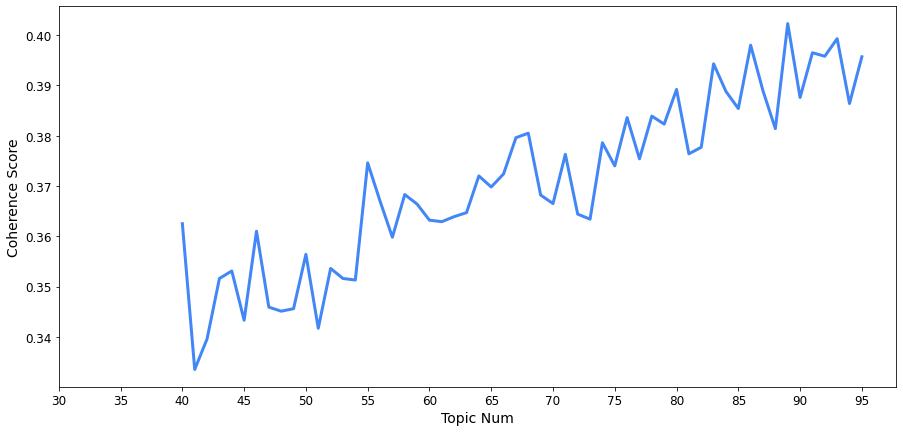

In [ ]:
# Use Gensim's NMF to get the best num of topics via coherence score

# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(40, 95 + 1))

# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=100,
        normalize=True,
        random_state=42
    )
    
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_scores.append(round(cm.get_coherence(), 4))

# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
#plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(40, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)

plt.show()

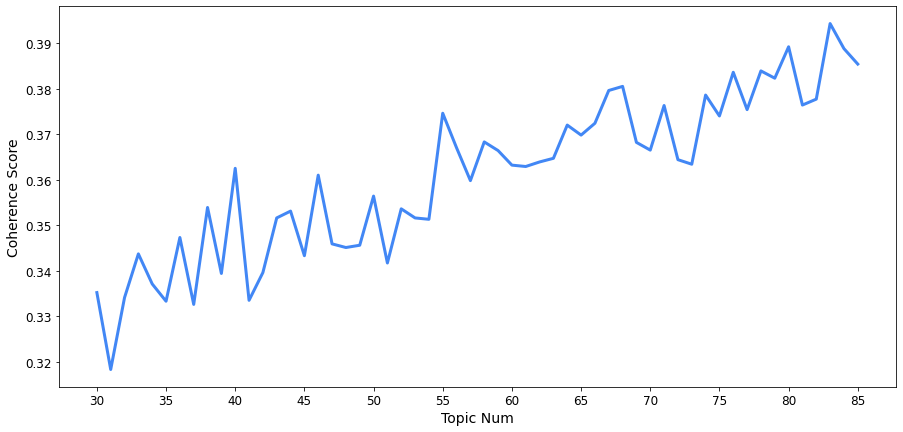

In [ ]:
# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
#plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(30, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [ ]:
scores

[(30, 0.3352),
 (31, 0.3183),
 (32, 0.3341),
 (33, 0.3437),
 (34, 0.3371),
 (35, 0.3333),
 (36, 0.3473),
 (37, 0.3326),
 (38, 0.3539),
 (39, 0.3394),
 (40, 0.3625),
 (41, 0.3335),
 (42, 0.3396),
 (43, 0.3516),
 (44, 0.3531),
 (45, 0.3433),
 (46, 0.361),
 (47, 0.3459),
 (48, 0.3451),
 (49, 0.3456),
 (50, 0.3564),
 (51, 0.3417),
 (52, 0.3536),
 (53, 0.3516),
 (54, 0.3513),
 (55, 0.3746),
 (56, 0.367),
 (57, 0.3598),
 (58, 0.3683),
 (59, 0.3664),
 (60, 0.3632),
 (61, 0.3629),
 (62, 0.3639),
 (63, 0.3647),
 (64, 0.372),
 (65, 0.3698),
 (66, 0.3724),
 (67, 0.3796),
 (68, 0.3805),
 (69, 0.3682),
 (70, 0.3665),
 (71, 0.3763),
 (72, 0.3644),
 (73, 0.3634),
 (74, 0.3786),
 (75, 0.374),
 (76, 0.3836),
 (77, 0.3754),
 (78, 0.3839),
 (79, 0.3823),
 (80, 0.3892),
 (81, 0.3764),
 (82, 0.3777),
 (83, 0.3943),
 (84, 0.3888),
 (85, 0.3854)]

In [ ]:
best_num_topics

89

In [ ]:
#best_num_topics = 53

In [ ]:
nmfdata.head(1)

,Unnamed: 0,text,clean_tweet,Origin_NO,column_name,processed_text
0,19810,stop killing/harming black people #jacobblake #blacklivesmatter #enoughisenough #defundthepolice #justiceforjacobblake #justiceforbreonna #justiceforjacob #allcopsarebastards #abolishthepolice #allcopsaremurderers #allcopsarekillers #allcopsaredemons #allcopsaretrash https://t.co/w83abgwa4v,stop killing harming black people,19810,stop killing harming black people,"[stop, killing, harming, black, people]"


In [ ]:
# test from here
texts = nmfdata['processed_text']
# Create the tfidf weights
tfidf_vectorizer = TfidfVectorizer(
    min_df=3, #ignore words that appear in less than 3 of the articles
    max_df=0.85, #ignore words that appear in more than 85% of the articles
    #max_features=5000, #only include the top 5K by term frequency across the articles
    ngram_range=(1, 3), stop_words=stop_words,preprocessor=' '.join
)
tfidf = tfidf_vectorizer.fit_transform(texts)
tfidf

<20000x11961 sparse matrix of type '<class 'numpy.float64'>'
	with 160845 stored elements in Compressed Sparse Row format>

In [ ]:
nmf_model = NMF(
    n_components=best_num_topics,
    init='nndsvd', #id2word=dictionary,
    max_iter=500,
    l1_ratio=0.0,
    solver='cd',
    alpha=0.0,
    tol=1e-4,
    random_state=42
)
# fitting and transforming tfidf obtained,
# to get weights corresponding to belongingness of the document to each topic

topics=nmf_model.fit_transform(tfidf)

/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kwargs['lwork'] = ret[-2][0].real.astype(numpy.int)
/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

In [ ]:
# coefficient weights for the document0, 
#higher coefficient weights implies higher chances of belonging into particular topic.
topics[0]

array([7.59938191e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.54174460e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.57576448e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.31914038e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.29156953e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.32055313e-05,
       0.00000000e+00, 3.05599624e-03, 0.00000000e+00, 1.61955572e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.10991305e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [ ]:
# 89 × 11961 matrix for topic and words correspondence
#pd.DataFrame(nmf_model.components_,columns=tfidf_vectorizer.get_feature_names())

In [ ]:
nmf_model.components_

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00249212, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.02205869, 0.02205869,
        0.02205869],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

THE TOP 10 WORDS FOR TOPIC #0
['latest', 'check latest', 'awesome', 'area', 'users', 'area check', 'amazon', 'check video', 'video', 'check']


THE TOP 10 WORDS FOR TOPIC #1
['wind gust', 'gust', 'humidity', 'feels', 'humidity wind gust', 'gust pressure', 'feels humidity wind', 'wind gust pressure', 'humidity wind', 'feels humidity']


THE TOP 10 WORDS FOR TOPIC #2
['hedge', 'gamestop', 'money', 'stock', 'street journal', 'wall street journal', 'journal', 'wall street', 'wall', 'street']


THE TOP 10 WORDS FOR TOPIC #3
['like button', 'ooks', 'ooks like', 'feels', 'people like', 'feel like', 'feels like', 'looks', 'looks like', 'like']


THE TOP 10 WORDS FOR TOPIC #4
['posted photo design', 'posted photo wall', 'photo wall', 'photo wall street', 'design', 'studio', 'posted video', 'posted photo', 'photo', 'posted']


THE TOP 10 WORDS FOR TOPIC #5
['love love', 'show love', 'love bruno', 'awesome', 'design', 'love much', 'really love', 'much love', 'outside', 'love']


THE TOP 10 WORDS 

In [ ]:
nmfdata['Topic']=topics.argmax(axis=1)
nmfdata

,Unnamed: 0,text,clean_tweet,Origin_NO,column_name,processed_text,Topic
0,19810,stop killing/harming black people #jacobblake #blacklivesmatter #enoughisenough #defundthepolice #justiceforjacobblake #justiceforbreonna #justiceforjacob #allcopsarebastards #abolishthepolice #allcopsaremurderers #allcopsarekillers #allcopsaredemons #allcopsaretrash https://t.co/w83abgwa4v,stop killing harming black people,19810,stop killing harming black people,"[stop, killing, harming, black, people]",21
1,12111,join @sistersuncut in support of @sistah_space to protest @hackneycouncils eviction of them from their premises. hackney town hall from 3pm monday #blacklivesmatter https://t.co/rgfkqfuvcw,join support protest eviction premises hackney town hall pm monday,12111,join support protest eviction premises hackney town hall pm monday,"[join, support, protest, eviction, premises, hackney, town, hall, monday]",88
2,17552,#blacklivesmatter: milwaukee bucks boycott game 5 of their nba playoff series in response to blake shooting https://t.co/zwjshacsvh,milwaukee bucks boycott game nba playoff series response blake shooting,17552,milwaukee bucks boycott game nba playoff series response blake shooting,"[milwaukee, bucks, boycott, game, playoff, series, response, blake, shooting]",29
3,9540,"this is why i say fuk professional sports for boycotting in the name of that rapist jacob blake. i wish the police wouldve shot that racist 7 times in his dick. #blacklivesmatter you say those police officers agree with you thats why they were there, to protect a black woman https://t.co/zl22czoran",fuk professional sports boycotting name rapist jacob blake wish shot racist times dick officers agree protect black woman,9540,fuk professional sports boycotting name rapist jacob blake wish shot racist times dick officers agree protect black woman,"[professional, sports, boycotting, name, rapist, jacob, blake, wish, shot, racist, times, dick, officers, agree, protect, black, woman]",42
4,9299,"sep 11th, 2020... a week from today... another vigil/vigilant movie drops on my youtube channel at approximately 8:45am link in bio\n\n\n\n#faith #consciousness #inspiration #justice #hope #blacklivesmatter https://t.co/xnryxg37wm",sep th week another vigil vigilant movie drops youtube channel approximately link bio,9299,sep th week another vigil vigilant movie drops youtube channel approximately link bio,"[week, another, vigil, vigilant, movie, drops, youtube, channel, approximately, link]",86
...,...,...,...,...,...,...,...
19995,10347,57.0f feels: 54.6f - humidity: 61% - wind: 3.9mph ne - gust: 4.2mph - pressure: 30.293in #weather https://t.co/75yznj23eh,f feels f humidity wind mph ne gust mph pressure,10347,f feels f humidity wind mph ne gust mph pressure,"[feels, humidity, wind, gust, pressure]",1
19996,5390,another photo from poolbeg last night. hope everyones enjoying the nice weather\n#sunset #dublin #photography #irishbusiness https://t.co/dysewdtyzs,another photo poolbeg last night hope everyone enjoying nice,5390,another photo poolbeg last night hope everyone enjoying nice,"[another, photo, poolbeg, last, night, hope, everyone, enjoying, nice]",86
19997,4256,beautiful #spring day #chicago \n70\n\n#weather https://t.co/o8z3ekaoq5,beautiful,4256,beautiful,[beautiful],25
19998,11144,"in 7 days, ill be on my way to nyc for my first out-of-state trip since feb 2020, and my first time in new york in warm weather\n\nso. what do i need to do",days ill way nyc first state trip since feb first new york warm need,11144,days ill way nyc first state trip since feb first new york warm need,"[days, first, state, trip, since, first, york, warm, need]",36


In [ ]:
nmfdata['Topic'].value_counts()

0     990
76    751
86    535
88    493
2     481
     ... 
69     73
53     71
50     67
32     65
39     61
Name: Topic, Length: 89, dtype: int64

In [ ]:
# Showing the 3 matrices we get witn nmf
A = tfidf_vectorizer.transform(texts)
W = nmf.components_
H = nmf.transform(A)

print('A = {} x {}'.format(A.shape[0], A.shape[1]))
print('W = {} x {}'.format(W.shape[0], W.shape[1]))
print('H = {} x {}'.format(H.shape[0], H.shape[1]))

A = 20000 x 11961
W = 89 x 11961
H = 20000 x 89


In [ ]:
# Get the residuals for each document # 77:19080.248 ; 53:19165.365 ; 89:18329.878
r = np.zeros(A.shape[0])

for row in range(A.shape[0]):
    r[row] = np.linalg.norm(A[row, :] - H[row, :].dot(W), 'fro')

sum_sqrt_res = round(sum(np.sqrt(r)), 3)
'Sum of the squared residuals is {}'.format(sum_sqrt_res)

'Sum of the squared residuals is 18329.878'

In [ ]:
# Add the residuals to the df
df_topics['resid'] = r

# Get the avg residual by topic
resid_data = df_topics[['topic_num','resid']].groupby('topic_num').mean().sort_values(by='resid')

# Plot a bar chart for the avg. residuls by topic
fig = plt.figure(figsize=(20,7))

x = resid_data.index
y = resid_data['resid']
    
g = sns.barplot(x=x, y=y, order=x, palette='rocket')

g.set_xticklabels(g.get_xticklabels(),fontsize=8)

plt.yticks(fontsize=14)
plt.xlabel('Topic Number', fontsize=14)
plt.ylabel('Residual', fontsize=14)
#plt.title('Avg. Residuals by Topic Number', fontsize=17)

plt.show()

In [ ]:
# --------------- end of test --------------------- #

In [ ]:
best_num_topics = 89
# Now use the number of topics with the 
# highest coherence score to run the 
# sklearn nmf model
texts = nmfdata['processed_text']

# Create the tfidf weights
tfidf_vectorizer = TfidfVectorizer(
    min_df=3, #ignore words that appear in less than 3 of the articles
    max_df=0.85, #ignore words that appear in more than 85% of the articles
    #max_features=5000, #only include the top 5K by term frequency across the articles
    ngram_range=(1, 3), stop_words=stop_words, 
    preprocessor=' '.join
)
  
tfidf = tfidf_vectorizer.fit_transform(texts)

# Save the feature names for later to create topic summaries
tfidf_fn = tfidf_vectorizer.get_feature_names()

# Run the nmf model
nmf = NMF(
    n_components=best_num_topics,
    init='nndsvd', #id2word=dictionary,
    max_iter=500,
    l1_ratio=0.0,
    solver='cd',
    alpha=0.0,
    tol=1e-4,
    random_state=42
).fit(tfidf)

/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kwargs['lwork'] = ret[-2][0].real.astype(numpy.int)
/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

In [ ]:
# Use the top words for each cluster by tfidf weight
# to create 'topics'

# Getting a df with each topic by document
docweights = nmf.transform(tfidf_vectorizer.transform(texts))

n_top_words = 15

topic_df = topic_table(nmf, tfidf_fn, n_top_words).T

# Cleaning up the top words to create topic summaries
topic_df['topics'] = topic_df.apply(lambda x: [' '.join(x)], axis=1) # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets
topic_df['topics'] = topic_df['topics'].apply(lambda x: whitespace_tokenizer(x)) # tokenize
topic_df['topics'] = topic_df['topics'].apply(lambda x: unique_words(x))  # Removing duplicate words
topic_df['topics'] = topic_df['topics'].apply(lambda x: [' '.join(x)])  # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets

In [ ]:
# Create a df with only the created topics and topic num
topic_df = topic_df['topics'].reset_index()
topic_df.columns = ['topic_num', 'topics']
#topic_df.head(5)

In [ ]:
pd.set_option('display.max_rows', None) 
topic_df

,topic_num,topics
0,0,check video amazon area users awesome latest premise anthonys onlyfans
1,1,feels humidity wind gust pressure like good
2,2,street wall journal stock money gamestop hedge market reddit funds occupy
3,3,like looks feels feel people ooks button bruno seems share
4,4,posted photo video studio design wall street shah forty alicias pennsylvania
5,5,love outside much really design awesome bruno show style sisters making cold
6,6,portland port cold priority disturbance unwanted person theft suspicious blvd
7,7,want play really hear make know anyone videos help wings change shoot makes
8,8,good morning luck guys news curry thanks work pretty ooking looking going feel
9,9,bruno song paak anderson california door official open leave like


In [ ]:
# Creating a temp df with the url and topic num to join on
url = nmfdata['clean_tweet'].tolist()

df_temp = pd.DataFrame({
    'clean_tweet': url,
    'topic_num': docweights.argmax(axis=1)
})

In [ ]:
# Merging to get the topic num with url
merged_topic = df_temp.merge(topic_df, on='topic_num', how='left')

In [ ]:
df_topics=nmfdata.join(merged_topic, how="outer",lsuffix = 'clean_tweet')
#df_topics=pd.merge(nmfdata, merged_topic, on='clean_tweet', how='left')
#df_topics.head(2)

In [ ]:
df_topics = df_topics.drop(['Unnamed: 0','clean_tweetclean_tweet', 'Origin_NO','column_name','clean_tweet'], axis=1)
df_topics.head(3)

,text,processed_text,topic_num,topics
0,stop killing/harming black people #jacobblake #blacklivesmatter #enoughisenough #defundthepolice #justiceforjacobblake #justiceforbreonna #justiceforjacob #allcopsarebastards #abolishthepolice #allcopsaremurderers #allcopsarekillers #allcopsaredemons #allcopsaretrash https://t.co/w83abgwa4v,"[stop, killing, harming, black, people]",21,black white people community name stop racist tulsa lives women woman america history
1,join @sistersuncut in support of @sistah_space to protest @hackneycouncils eviction of them from their premises. hackney town hall from 3pm monday #blacklivesmatter https://t.co/rgfkqfuvcw,"[join, support, protest, eviction, premises, hackney, town, hall, monday]",88,support thanks show link community local donate friends available youtube boys please green
2,#blacklivesmatter: milwaukee bucks boycott game 5 of their nba playoff series in response to blake shooting https://t.co/zwjshacsvh,"[milwaukee, bucks, boycott, game, playoff, series, response, blake, shooting]",29,game season mobile games played varsity watching play football first video changer enjoy


In [ ]:
# Showing the 3 matrices we get witn nmf
A = tfidf_vectorizer.transform(texts)
W = nmf.components_
H = nmf.transform(A)

print('A = {} x {}'.format(A.shape[0], A.shape[1]))
print('W = {} x {}'.format(W.shape[0], W.shape[1]))
print('H = {} x {}'.format(H.shape[0], H.shape[1]))

A = 20000 x 11961
W = 89 x 11961
H = 20000 x 89


In [ ]:
# Get the residuals for each document # 77:19080.248 ; 53:19165.365 ; 89:18329.878
r = np.zeros(A.shape[0])

for row in range(A.shape[0]):
    r[row] = np.linalg.norm(A[row, :] - H[row, :].dot(W), 'fro')

sum_sqrt_res = round(sum(np.sqrt(r)), 3)
'Sum of the squared residuals is {}'.format(sum_sqrt_res)

'Sum of the squared residuals is 18329.878'

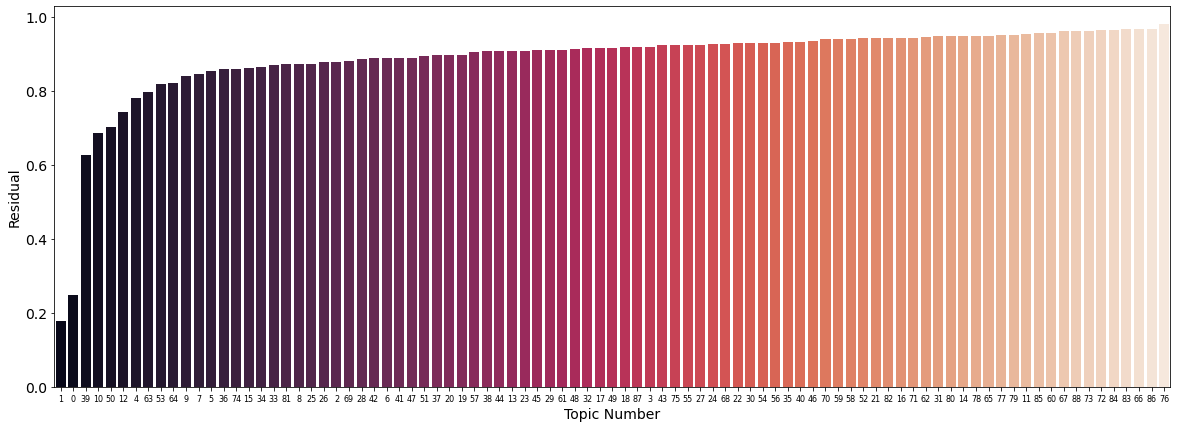

In [ ]:
# Add the residuals to the df
df_topics['resid'] = r

# Get the avg residual by topic
resid_data = df_topics[['topic_num','resid']].groupby('topic_num').mean().sort_values(by='resid')

# Plot a bar chart for the avg. residuls by topic
fig = plt.figure(figsize=(20,7))

x = resid_data.index
y = resid_data['resid']
    
g = sns.barplot(x=x, y=y, order=x, palette='rocket')

g.set_xticklabels(g.get_xticklabels(),fontsize=8)

plt.yticks(fontsize=14)
plt.xlabel('Topic Number', fontsize=14)
plt.ylabel('Residual', fontsize=14)
#plt.title('Avg. Residuals by Topic Number', fontsize=17)

plt.show()

In [ ]:
#check the worst topic
last_resi = df_topics.loc[df_topics['topic_num'] == 76]
last_resi 

,text,processed_text,topic_num,topics,resid
42,down with systemic racism #arcticnationalwildliferefuge #blacklivesstillmatter #blacklivesmatter #blm #biden2020landslide #bannonindicted #biden2020 #bidenharristosaveamerica #bidenharris2020 #votebidenharris2020 #votebidenharristosaveamerica #votebluetosaveamerica https://t.co/k9m3je7xsz,"[systemic, racism]",76,president bidens days trump america united office congress house white states american speech,0.999393
52,feeling more static shocks now days. is it due to 5g radiation. @dir_education @tatapower_ddl @bsesdelhi,"[feeling, static, shocks, days, radiation]",76,president bidens days trump america united office congress house white states american speech,0.995814
73,look at it thats whats happing in america #blacklivesmatter https://t.co/v7v2ada76b,"[happing, america]",76,president bidens days trump america united office congress house white states american speech,0.988556
191,#blm #blacklivesmatter @ dr. carter g. woodson african american museum https://t.co/f3r37myfd6,"[carter, woodson, african, american, museum]",76,president bidens days trump america united office congress house white states american speech,0.999509
223,"there as here, change happens with action \n\n#morethanavote \n#blacklivesmatter https://t.co/gxi4rin2ur","[change, happens, action]",76,president bidens days trump america united office congress house white states american speech,0.997182
...,...,...,...,...,...
19353,sweater weather https://t.co/a1gfct0rjh,[sweater],76,president bidens days trump america united office congress house white states american speech,0.999965
19376,"fox heliport, new zealand - deer harbor spb, united states\nfgl-dhb\nweather mon: rain/10c","[heliport, zealand, deer, harbor, united, states, rain]",76,president bidens days trump america united office congress house white states american speech,0.992003
19587,"monument valley airport, united states - miles airport, australia\ngmv-wle\nweather fri: clear-day/15c","[monument, valley, airport, united, states, miles, airport, australia, clear]",76,president bidens days trump america united office congress house white states american speech,0.998001
19823,lovee sweater weather days https://t.co/keblleqpsb,"[ovee, sweater, days]",76,president bidens days trump america united office congress house white states american speech,0.991838


In [ ]:
last_resi.sort_values(by=['resid'], inplace=True, ascending=False)
last_resi.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,text,processed_text,topic_num,topics,resid
7980,"#cat #pets #animals @ vienna, austria https://t.co/8kdapzp9cg","[vienna, austria]",76,president bidens days trump america united office congress house white states american speech,1.000000
1431,"#mymindstellingmeno #butmybodyistellingmeyes #partyfowlband #pizza #cheatday #cutco @ clayton, delaware https://t.co/qkhnaxzy52","[clayton, delaware]",76,president bidens days trump america united office congress house white states american speech,0.999994
15309,"you: get this #seriousdeals before my tax deadline may 17, 2021 \n\nhttps://t.co/mrrmhbzfwb #seriousbuyer #insta #sun #beautiful #red #likeforlike #comment #food #taxes #model #follow #hipster #filter #music #filters",[deadline],76,president bidens days trump america united office congress house white states american speech,0.999987
18208,191002 son naeun amp signorina - apink son na-eun animation gif https://t.co/ifxwcavvw4,"[naeun, signorina, apink]",76,president bidens days trump america united office congress house white states american speech,0.999986
3280,#bitcoin investments :,[investments],76,president bidens days trump america united office congress house white states american speech,0.999980
14422,waves and clouds\n#waves #cloudyday #olas #beachtime #dogbeach #playa #mediterranean #torroxcosta #dianublado #marejada #blue #mar #sea #seaside #picoftheday #photography #walkingthedogs #depaseo #instamoment https://t.co/1oznbv7btk,"[waves, clouds]",76,president bidens days trump america united office congress house white states american speech,0.999979
13090,soccers secret revolutionary revealed https://t.co/hgodvhjrb7 via @youtube\namr fahmy,"[soccers, secret, revolutionary, revealed, fahmy]",76,president bidens days trump america united office congress house white states american speech,0.999968
16325,today on the craft table #greetingsa2z #comingout #pride #lgbt @ greetingsa2z https://t.co/111fw2wcb0,"[craft, table, greetingsaz]",76,president bidens days trump america united office congress house white states american speech,0.999966
19353,sweater weather https://t.co/a1gfct0rjh,[sweater],76,president bidens days trump america united office congress house white states american speech,0.999965
6172,"will #mars be divided by #names, #religion, and #borders between #inhabitants #elonmusk #earth",[divided],76,president bidens days trump america united office congress house white states american speech,0.999956


In [ ]:
nmftest=pd.read_csv('gdrive/My Drive/nmftest.csv')
nmfcheck = nmftest[['text']]
nmfcheck.head(2)

,text
0,Kobe died this year that should’ve been everybody hardest pill to swallow https://t.co/8tLzQcaeP8
1,1080p Animation https://t.co/gENxTkRc1m


In [ ]:
# remove emoji, set contract
nmfcheck['text'] = nmfcheck['text'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)

nmfcheck['no_contract'] = nmfcheck['text'].apply(lambda x: [contractions.fix(word) for word in x.split()])

nmfcheck['text_str'] = [' '.join(map(str, l)) for l in nmfcheck['no_contract']]
def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    '''# ####3 #############3 ##############3 ###########3'''
    tweet = re.sub(r'\d+', '', tweet) #removes the digits
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    # tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    tweet = re.sub('(#[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove hashtag
    return tweet

stop_words = nltk.corpus.stopwords.words('english')
stop_words.extend(['5g','blacklivesmatter','pizza',
                   'iphone','covid','corona','police','bitcoin', 'soccer',
                   'kobe','photography','biden','music','mars','lgbt',
                   'cat','tiktok','pubg','animation','wallstreet','weather',
                   'is','am','are','be', 'to','from','subject','re','edu',
                   'see','say','not','would','could','look','seem',
                   'come','go','get','do','done','bring','take',
                   'today','yesterday','tomorrow','time','year','month','day',
                   'some','many','little','less','more','most','than',
                   'also'])
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@#'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    #tweet = re.sub('([0,1,2,3,4,6,7,8,9]+)', '', tweet) # remove numbers, except "5"
    #tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
   
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in stop_words] # remove stopwords
    #tweet_token_list = [word_rooter(word) if '#' not in word else word for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet
nmfcheck['clean_tweet'] = nmfcheck.text_str.apply(clean_tweet)
nmfcheck['processed_text'] = nmfcheck.clean_tweet.tolist()

nmfcheck.head(2)

<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: DeprecationWarning: invalid escape sequence \w
<input>:2: Dep

,text,no_contract,text_str,clean_tweet,processed_text
0,Kobe died this year that shouldve been everybody hardest pill to swallow https://t.co/8tLzQcaeP8,"[Kobe, died, this, year, that, should have, been, everybody, hardest, pill, to, swallow, https://t.co/8tLzQcaeP8]",Kobe died this year that should have been everybody hardest pill to swallow https://t.co/8tLzQcaeP8,died everybody hardest pill swallow,died everybody hardest pill swallow
1,1080p Animation https://t.co/gENxTkRc1m,"[1080p, Animation, https://t.co/gENxTkRc1m]",1080p Animation https://t.co/gENxTkRc1m,p,p


In [ ]:
# Predicting the topic for an unseen article

# Load the unseen articles for prediction

df_new = nmfcheck.copy()

## Process the text
df_new['column_name']=df_new['clean_tweet'].apply(str)
df_new['processed_text'] = df_new['column_name'].apply(process_text)
df_new

,text,no_contract,text_str,clean_tweet,processed_text,column_name
0,Kobe died this year that shouldve been everybody hardest pill to swallow https://t.co/8tLzQcaeP8,"[Kobe, died, this, year, that, should have, been, everybody, hardest, pill, to, swallow, https://t.co/8tLzQcaeP8]",Kobe died this year that should have been everybody hardest pill to swallow https://t.co/8tLzQcaeP8,died everybody hardest pill swallow,"[died, everybody, hardest, pill, swallow]",died everybody hardest pill swallow
1,1080p Animation https://t.co/gENxTkRc1m,"[1080p, Animation, https://t.co/gENxTkRc1m]",1080p Animation https://t.co/gENxTkRc1m,p,[],p
2,Are you T-Mobile #5G fast Play this interactive video to find out. #GalaxyS21 5G. #TMobileTuesdays #useek https://t.co/TIpTRDPTtI via @useek_official,"[Are, you, T-Mobile, #5G, fast, Play, this, interactive, video, to, find, out., #GalaxyS21, 5G., #TMobileTuesdays, #useek, https://t.co/TIpTRDPTtI, via, @useek_official]",Are you T-Mobile #5G fast Play this interactive video to find out. #GalaxyS21 5G. #TMobileTuesdays #useek https://t.co/TIpTRDPTtI via @useek_official,mobile g fast play interactive video find g via,"[mobile, fast, play, interactive, video, find]",mobile g fast play interactive video find g via
3,Apollo Hospital has promised GOWB to add 300 more covid beds in next few days. \n\nNarayana Hrudayalaya group has agreed to use their vacant floors in the Netralaya facilities at Salt Lake for adding 35 more beds shortly. \nVerified.,"[Apollo, Hospital, has, promised, GOWB, to, add, 300, more, covid, beds, in, next, few, days., Narayana, Hrudayalaya, group, has, agreed, to, use, their, vacant, floors, in, the, Netralaya, facilities, at, Salt, Lake, for, adding, 35, more, beds, shortly., Verified.]",Apollo Hospital has promised GOWB to add 300 more covid beds in next few days. Narayana Hrudayalaya group has agreed to use their vacant floors in the Netralaya facilities at Salt Lake for adding 35 more beds shortly. Verified.,apollo hospital promised gowb add beds next days narayana hrudayalaya group agreed use vacant floors netralaya facilities salt lake adding beds shortly verified,"[apollo, hospital, promised, gowb, beds, next, days, narayana, hrudayalaya, group, agreed, vacant, floors, netralaya, facilities, salt, lake, adding, beds, shortly, verified]",apollo hospital promised gowb add beds next days narayana hrudayalaya group agreed use vacant floors netralaya facilities salt lake adding beds shortly verified
4,"The Wall Street Journal: U.K. COVID-19 strain doesnt lead to more deaths, study finds https://t.co/WaoJUd5A3T #Nifty #Sipgrab #UnitingPeopleWithThePossibilities","[The, Wall, Street, Journal:, you.K., COVID-19, strain, does not, lead, to, more, deaths,, study, finds, https://t.co/WaoJUd5A3T, #Nifty, #Sipgrab, #UnitingPeopleWithThePossibilities]","The Wall Street Journal: you.K. COVID-19 strain does not lead to more deaths, study finds https://t.co/WaoJUd5A3T #Nifty #Sipgrab #UnitingPeopleWithThePossibilities",wall street journal k strain lead deaths study finds,"[wall, street, journal, strain, lead, deaths, study, finds]",wall street journal k strain lead deaths study finds
5,"Slowly going thru The Ancient Magus Bride savoring the animation amp character arcs. Doing ServiceNow amp PowerApps tutorials for work. @ Stonebridge in Harrisburg, PA https://t.co/YSTYQEubDA https://t.co/eM5lW03avc","[Slowly, going, thru, The, Ancient, Magus, Bride, savoring, the, animation, amp, character, arcs., Doing, ServiceNow, amp, PowerApps, tutorials, for, work., @, Stonebridge, in, Harrisburg,, PA, https://t.co/YSTYQEubDA, https://t.co/eM5lW03avc]","Slowly going thru The Ancient Magus Bride savoring the animation amp character arcs. Doing ServiceNow amp PowerApps tutorials for work. @ Stonebridge in Harrisburg, PA https://t.co/YSTYQEubDA https://t.co/eM5lW03avc",slowly going thru ancient magus bride savoring amp character arcs servicenow amp powerapps tutorials work stonebridge harrisburg pa,"[slowly, goin

In [ ]:
df_new = df_new.drop(['no_contract', 'text_str','clean_tweet','column_name'], axis=1) 
#

In [ ]:
new_texts = df_new['processed_text']

# Transform the new data with the fitted models
tfidf_new = tfidf_vectorizer.transform(new_texts)
X_new = nmf.transform(tfidf_new)

# Get the top predicted topic
predicted_topics = [np.argsort(each)[::-1][0] for each in X_new]

# Add to the df
df_new['pred_topic_num'] = predicted_topics

df_new

,text,processed_text,pred_topic_num
0,Kobe died this year that shouldve been everybody hardest pill to swallow https://t.co/8tLzQcaeP8,"[died, everybody, hardest, pill, swallow]",81
1,1080p Animation https://t.co/gENxTkRc1m,[],88
2,Are you T-Mobile #5G fast Play this interactive video to find out. #GalaxyS21 5G. #TMobileTuesdays #useek https://t.co/TIpTRDPTtI via @useek_official,"[mobile, fast, play, interactive, video, find]",63
3,Apollo Hospital has promised GOWB to add 300 more covid beds in next few days. \n\nNarayana Hrudayalaya group has agreed to use their vacant floors in the Netralaya facilities at Salt Lake for adding 35 more beds shortly. \nVerified.,"[apollo, hospital, promised, gowb, beds, next, days, narayana, hrudayalaya, group, agreed, vacant, floors, netralaya, facilities, salt, lake, adding, beds, shortly, verified]",60
4,"The Wall Street Journal: U.K. COVID-19 strain doesnt lead to more deaths, study finds https://t.co/WaoJUd5A3T #Nifty #Sipgrab #UnitingPeopleWithThePossibilities","[wall, street, journal, strain, lead, deaths, study, finds]",2
5,"Slowly going thru The Ancient Magus Bride savoring the animation amp character arcs. Doing ServiceNow amp PowerApps tutorials for work. @ Stonebridge in Harrisburg, PA https://t.co/YSTYQEubDA https://t.co/eM5lW03avc","[slowly, going, thru, ancient, magus, bride, savoring, character, arcs, servicenow, powerapps, tutorials, work, stonebridge, harrisburg]",13
6,Its important to have LGBT-inclusive education. Children do better when they learn about themselves/see themselves reflected. I know I would have done way better in school if they had inclusive curriculum. https://t.co/2FqtkIASW0,"[important, inclusive, education, children, better, learn, reflected, know, better, school, inclusive, curriculum]",57
7,What came out of Bidens mouth tonight were lies and bullshit being pushed by the radical scumbag Democrats,"[came, bidens, mouth, tonight, lies, bullshit, pushed, radical, scumbag, democrats]",44
8,Cleaning day time to crank up the music https://t.co/pOccxiWb6Z,"[cleaning, crank]",46
9,hi when is biden gonna eat my student debt,"[going, student, debt]",13


In [ ]:
# Join with the original df to get the topic summary
df_new = pd.merge(
    df_new.drop('processed_text', axis=1),
    df_topics[['topic_num', 'topics']],
    left_on='pred_topic_num',
    right_on='topic_num',
    how='inner' 
).drop_duplicates().drop(['topic_num'], axis=1)

df_new

,text,pred_topic_num,topics
0,Kobe died this year that shouldve been everybody hardest pill to swallow https://t.co/8tLzQcaeP8,81,wolf wall street watching damn movie favorite everybody short wonder
156,1080p Animation https://t.co/gENxTkRc1m,88,support thanks show link community local donate friends available youtube boys please green
649,"For a cat, hes such a dog. https://t.co/mJDwMwelkV",88,support thanks show link community local donate friends available youtube boys please green
1142,Are you T-Mobile #5G fast Play this interactive video to find out. #GalaxyS21 5G. #TMobileTuesdays #useek https://t.co/TIpTRDPTtI via @useek_official,63,mobile find fast interactive video play blackpink
1239,Apollo Hospital has promised GOWB to add 300 more covid beds in next few days. \n\nNarayana Hrudayalaya group has agreed to use their vacant floors in the Netralaya facilities at Salt Lake for adding 35 more beds shortly. \nVerified.,60,next week weekend hours april different days waiting level start episode part bitco
1513,"The Wall Street Journal: U.K. COVID-19 strain doesnt lead to more deaths, study finds https://t.co/WaoJUd5A3T #Nifty #Sipgrab #UnitingPeopleWithThePossibilities",2,street wall journal stock money gamestop hedge market reddit funds occupy
1994,"Slowly going thru The Ancient Magus Bride savoring the animation amp character arcs. Doing ServiceNow amp PowerApps tutorials for work. @ Stonebridge in Harrisburg, PA https://t.co/YSTYQEubDA https://t.co/eM5lW03avc",13,going live tell make think literally crazy moon good train straight stop
2320,hi when is biden gonna eat my student debt,13,going live tell make think literally crazy moon good train straight stop
2646,Its important to have LGBT-inclusive education. Children do better when they learn about themselves/see themselves reflected. I know I would have done way better in school if they had inclusive curriculum. https://t.co/2FqtkIASW0,57,better much player seen saying cold used already gold anybody build chocolate full friends place
2840,What came out of Bidens mouth tonight were lies and bullshit being pushed by the radical scumbag Democrats,44,tonight sunset moon varsity girls proud catch dance cooking play join school back high dinner


In [ ]:
#pd.options.display.max_colwidth = 10000
#df_new
print(len(df_new))

15


In [ ]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(nmf.components_, columns=vect.get_feature_names())
components_df

NameError: ignored

In [ ]:
#Get the Words of the Highest Value for each Topic
for topic in range(components_df.shape[0]):
    tmp = components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

In [ ]:
model3 = GensimNmf(num_topics=60, corpus=corpus, id2word=id2word)
model3